# 1970년대 보스턴 지역의 주택 가격을 예측하는 회귀 문제

## 보스턴 주택가격 데이터 준비하기

In [ ]:
from keras.datasets.boston_housing import load_data

# 데이터 다운로드 (훈련셋: 80, 테스트셋:20)
(X_train, y_train), (X_test, y_test) = load_data(path = 'boston_housing.npz',
                                                 test_split=0.2, seed = 777) # 나누었을 때에는 결과가 동일하게 나오기 위해 시드를 고정시켜줍니다.

## 데이터 형태 확인하기

In [ ]:
print('X_train.shape : ', X_train.shape) # 13개의 feature 하나는 정답
print('y_train.shape : ', y_train.shape)

X_train.shape :  (404, 13)
y_train.shape :  (404,)


In [ ]:
type(X_train)  # 데이터 타입 확인해보기 -> 넘파이에서 제공하는 배열(자료 구조) -> 수처리 시 용이 (넘파이)

numpy.ndarray

In [ ]:
X_train

array([[2.51990e-01, 0.00000e+00, 1.05900e+01, ..., 1.86000e+01,
        3.89430e+02, 1.80600e+01],
       [1.58603e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        7.68000e+00, 2.43900e+01],
       [7.40389e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.14640e+02, 2.64000e+01],
       ...,
       [9.88430e-01, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.94540e+02, 1.98800e+01],
       [8.01400e-02, 0.00000e+00, 5.96000e+00, ..., 1.92000e+01,
        3.96900e+02, 8.77000e+00],
       [3.69200e-01, 0.00000e+00, 9.90000e+00, ..., 1.84000e+01,
        3.95690e+02, 9.28000e+00]])

In [ ]:
print('X_test.shape : ', X_test.shape)
print('y_test.shape : ', y_test.shape)

X_test.shape :  (102, 13)
y_test.shape :  (102,)


In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
y_train

array([22.5,  8.3, 17.2, 25. , 28.5, 23. , 18.9, 50. , 15.6, 38.7, 24.6,
       23.3,  9.5, 20. , 18.3, 36.4,  5. , 19.4, 28.1, 17.8, 19.6, 24.5,
       10.4, 23.7, 19.4, 23.9, 21.4, 29.9, 24.4, 23.1, 25. , 30.1, 22.8,
       22.8, 22. , 24.8, 15.6, 22. , 19.6, 13.1, 22.5, 18.9, 14.6, 13.3,
       17.4, 20.8, 10.8, 21.4, 17.2, 13.8, 28.7, 35.1, 10.2, 21.7, 20.5,
       25. , 21.1, 15.6, 23.6, 23.2, 28.7, 16.6, 26.2,  9.6, 18.2, 31.7,
       42.8, 16.1, 22.6, 18.1, 23.8, 11.8, 16. , 21.5, 13.9, 11.7, 44.8,
       20.1, 50. , 22.1, 20.6, 14.6, 48.8, 22.9, 14.4, 23.9, 15.6, 19.9,
       20.5,  8.7, 26.5, 20.3, 23.8, 44. , 18.5, 17.5, 22.8, 14.3, 10.9,
       36.1, 25. , 17.9, 17.7, 35.2, 20. , 24.3, 32.9, 15. , 50. , 33.8,
       21.9, 28.4, 10.2, 12. , 17.1, 17.1, 22. , 25.1, 20.9, 37.6, 15.6,
       43.5, 17.8, 20. , 15.2, 21.1, 19.9, 22.6, 14.4, 13.8, 37.3, 12.5,
       11.7, 26.6,  7.2, 18.6, 29. , 14.9, 14.2, 20.5, 19. , 50. , 27.1,
       18.4, 20.7, 29.6, 35.4, 21.7, 43.8, 22.6, 19

## 데이터 전처리 (feature) 표준화 (Standardization)

In [ ]:
# y값을 전처리 하는 것이 아님.

import numpy as np

# (데이터 - 전체평균) / 표준편차
mean = np.mean(X_train, axis=0) # 데이터의 평균이기에 axis = 0 이어야함.
std = np.std(X_train, axis=0)

In [ ]:
# 전처리(X_train, X_test) 둘 다 처리 -> 그래야 모델이 예측 가능
X_train = (X_train-mean)/std
X_test = (X_test-mean)/std

print(X_train[0])

[-0.40102395 -0.48033655 -0.12089418 -0.28828791 -0.58254176 -0.68137272
  0.11117586  0.26484408 -0.65187119 -0.80249043  0.0756568   0.37366783
  0.69211835]


## 검증 데이터셋 분리

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_var, y_train, y_var = train_test_split(X_train, y_train, test_size=0.33, random_state=777)

print(X_train.shape, X_var.shape)

(270, 13) (134, 13)


## 모델 구성하기

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(64, activation = 'relu', input_shape=(13,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) # 연속적인 값 -> linear -> defalut 가 linear 함수임, activation=linear

## 모델 설정하기

In [ ]:
model.compile(optimizer='adam',
              loss ='mse',
              metrics=['mae', 'mse'])

# mae -> 절댓값 씌우기
# mse -> 평균  ㄱ랴제곱

## 모델 학습하기

In [ ]:
history = model.fit(X_train, y_train, epochs=300, validation_data = (X_var, y_var))

Epoch 1/300
9/9 [==============================] - 1s 51ms/step - loss: 525.9562 - mae: 21.3049 - mse: 525.9562 - val_loss: 568.1336 - val_mae: 21.6104 - val_mse: 568.1336
Epoch 2/300
9/9 [==============================] - 0s 11ms/step - loss: 492.3399 - mae: 20.5015 - mse: 492.3399 - val_loss: 530.0695 - val_mae: 20.7430 - val_mse: 530.0695
Epoch 3/300
9/9 [==============================] - 0s 12ms/step - loss: 455.2853 - mae: 19.6226 - mse: 455.2853 - val_loss: 487.6470 - val_mae: 19.7374 - val_mse: 487.6470
Epoch 4/300
9/9 [==============================] - 0s 12ms/step - loss: 413.5503 - mae: 18.5796 - mse: 413.5503 - val_loss: 438.9461 - val_mae: 18.5071 - val_mse: 438.9461
Epoch 5/300
9/9 [==============================] - 0s 13ms/step - loss: 365.3047 - mae: 17.2908 - mse: 365.3047 - val_loss: 383.9541 - val_mae: 17.0017 - val_mse: 383.9541
Epoch 6/300
9/9 [==============================] - 0s 12ms/step - loss: 314.4199 - mae: 15.7956 - mse: 314.4199 - val_loss: 324.3122 - val_m

## 모델 학습 결과 분석

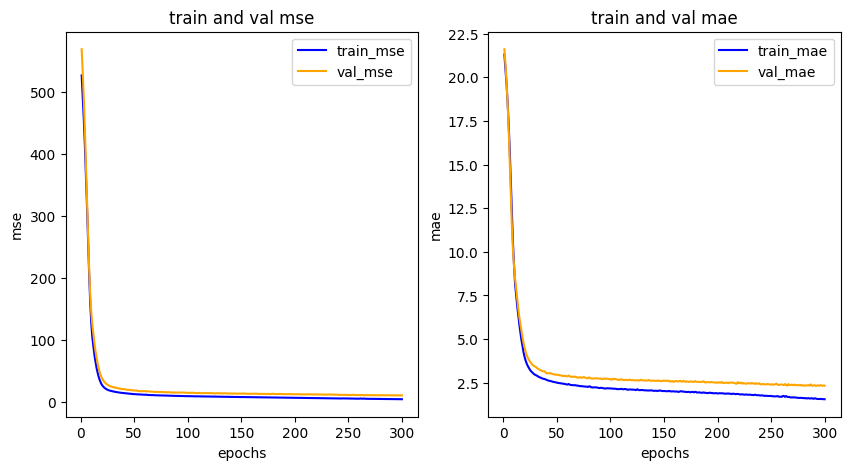

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
mse = his_dict['mse']
val_mse = his_dict['val_mse'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(mse) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, mse, color = 'blue', label = 'train_mse')
ax1.plot(epochs, val_mse, color = 'orange', label = 'val_mse')
ax1.set_title('train and val mse')
ax1.set_xlabel('epochs')
ax1.set_ylabel('mse')
ax1.legend()

mae = his_dict['mae']
val_mae = his_dict['val_mae']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color = 'orange', label = 'val_mae')
ax2.set_title('train and val mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()

plt.show()

## 모델 평가하기

In [ ]:
model.evaluate(X_test, y_test) # 2.2 -> 실제 집값과 2,200 달러 차이로 집값 예측

4/4 [==============================] - 0s 3ms/step - loss: 8.3711 - mae: 2.0692 - mse: 8.3711


[8.371108055114746, 2.0692076683044434, 8.371108055114746]

## 모델 예측하고 결과 확인

4/4 [==============================] - 0s 3ms/step


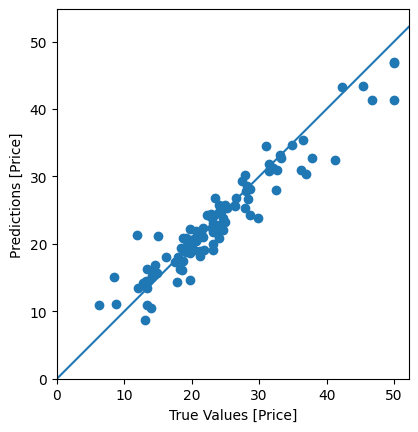

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

## K-Fold 사용하여 모델 학습하기


*   학습 데이터 부족으로 성능이 낮은 경우 적용 가능
*   검증 데이터셋을  K-Fold로 사용하여, 학습 데이터 확보



### K-Fold를 위한 데이터 준비하기

In [ ]:
from keras.datasets.boston_housing import load_data

# 데이터 다운로드 (훈련셋: 80, 테스트셋:20)
(X_train, y_train), (X_test, y_test) = load_data(path = 'boston_housing.npz',
                                                 test_split=0.2, seed = 777) # 나누었을 때에는 결과가 동일하게 나오기 위해 시드를 고정시켜줍니다.

### 데이터 전처리

In [ ]:
# y값을 전처리 하는 것이 아님.

import numpy as np

# (데이터 - 전체평균) / 표준편차
mean = np.mean(X_train, axis=0) # 데이터의 평균이기에 axis = 0 이어야함.
std = np.std(X_train, axis=0)

# 전처리(X_train, X_test) 둘 다 처리 -> 그래야 모델이 예측 가능
X_train = (X_train-mean)/std
X_test = (X_test-mean)/std

### K-Fold를 사용한 모델 학습

In [ ]:
from sklearn.model_selection import KFold

# 3-Fold 로 나눠서 검증데이터셋 사용하여 학습
k = 3

kfold = KFold(n_splits=k)

# 재사용을 위해 모델 구성 및 설정 함수로 선언
def get_model() :
  model = Sequential()

  model.add(Dense(64, activation = 'relu', input_shape=(13,)))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(1)) # 연속적인 값 -> linear -> defalut 가 linear 함수임, activation=linear

  model.compile(optimizer='adam', loss ='mse', metrics=['mae'])

  return model

# 각 모델(KFold)의 평가 정보를 담는 리스트 선언
mae_list =[]

# K번 학습 및 평가
for train_idx, val_idx in kfold.split(X_train) :

  # 학습데이터, 검증데이터 분리
  X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
  y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

  # 모델 불러오기
  model = get_model()

  # 모델 학습하기
  model.fit(X_train_fold, y_train_fold, epochs=300, validation_data=(X_val_fold, y_val_fold))

  # 모델 평가하기
  _, test_mae = model.evaluate(X_test, y_test)
  mae_list.append(test_mae)

Epoch 1/300
9/9 [==============================] - 1s 23ms/step - loss: 582.5691 - mae: 22.3011 - val_loss: 553.2283 - val_mae: 21.7121
Epoch 2/300
9/9 [==============================] - 0s 6ms/step - loss: 555.4946 - mae: 21.6389 - val_loss: 527.6104 - val_mae: 21.0711
Epoch 3/300
9/9 [==============================] - 0s 7ms/step - loss: 528.3732 - mae: 20.9724 - val_loss: 500.5488 - val_mae: 20.3834
Epoch 4/300
9/9 [==============================] - 0s 7ms/step - loss: 499.0051 - mae: 20.2301 - val_loss: 469.1771 - val_mae: 19.5721
Epoch 5/300
9/9 [==============================] - 0s 6ms/step - loss: 464.2508 - mae: 19.3257 - val_loss: 430.3604 - val_mae: 18.5720
Epoch 6/300
9/9 [==============================] - 0s 9ms/step - loss: 418.2268 - mae: 18.1728 - val_loss: 383.8256 - val_mae: 17.3158
Epoch 7/300
9/9 [==============================] - 0s 8ms/step - loss: 366.7779 - mae: 16.7581 - val_loss: 326.5999 - val_mae: 15.6999
Epoch 8/300
9/9 [==============================] - 0s 

In [ ]:
mae_list

[2.11674165725708, 2.074798822402954, 2.096494436264038]

### K-Fold 사용한 모델 성능평가

In [ ]:
np.mean(mae_list) # 2.1 -> 실제 집값과 약 2000달러 차이

2.0960116386413574

## 검증 데이터셋 사용하지 않고 학습한 모델 성능평가

In [ ]:
# (데이터-전체평균)/표준편차
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

# 전처리(X_train, X_test) 둘 다 처리
X_train = (X_train-mean)/std
X_teat = (X_test-mean)/std

model = Sequential()

model.add(Dense(64, activation = 'relu', input_shape=(13,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) # activation=linear

model.compile(optimizer='adam', loss ='mse', metrics=['mae'])

# 검증 데이터셋 사용하지 않고 모두 학습에 사용
model.fit(X_train, y_train, epochs=300)


Epoch 1/300
13/13 [==============================] - 1s 2ms/step - loss: 566.7299 - mae: 21.8350
Epoch 2/300
13/13 [==============================] - 0s 2ms/step - loss: 538.1199 - mae: 21.0632
Epoch 3/300
13/13 [==============================] - 0s 2ms/step - loss: 501.8079 - mae: 20.0717
Epoch 4/300
13/13 [==============================] - 0s 2ms/step - loss: 451.1584 - mae: 18.6767
Epoch 5/300
13/13 [==============================] - 0s 2ms/step - loss: 378.6278 - mae: 16.8129
Epoch 6/300
13/13 [==============================] - 0s 2ms/step - loss: 287.2979 - mae: 14.4510
Epoch 7/300
13/13 [==============================] - 0s 2ms/step - loss: 188.3255 - mae: 11.5150
Epoch 8/300
13/13 [==============================] - 0s 2ms/step - loss: 106.7309 - mae: 8.2086
Epoch 9/300
13/13 [==============================] - 0s 2ms/step - loss: 61.0929 - mae: 5.7928
Epoch 10/300
13/13 [==============================] - 0s 2ms/step - loss: 45.1250 - mae: 4.8175
Epoch 11/300
13/13 [==============

In [ ]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 9.5099 - mae: 2.1822


[9.509883880615234, 2.182154417037964]

## 4-Fold를 사용한 모델 성능평가

In [ ]:
# K-Fold 를 위한 데이터 준비하기

from keras.datasets.boston_housing import load_data

# 데이터 다운로드 (훈련셋: 80, 테스트셋:20)
(X_train, y_train), (X_test, y_test) = load_data(path = 'boston_housing.npz',
                                                 test_split=0.2, seed = 777) # 나누었을 때에는 결과가 동일하게 나오기 위해 시드를 고정시켜줍니다.

# 데이터 전처리

import numpy as np

# (데이터 - 전체평균) / 표준편차
mean = np.mean(X_train, axis=0) # 데이터의 평균이기에 axis = 0 이어야함.
std = np.std(X_train, axis=0)

# 전처리(X_train, X_test) 둘 다 처리 -> 그래야 모델이 예측 가능
X_train = (X_train-mean)/std
X_test = (X_test-mean)/std

# K-Fold 를 사용한 모델 학습

from sklearn.model_selection import KFold

# 4-Fold 로 나눠서 검증데이터셋 사용하여 학습
k = 4

kfold = KFold(n_splits=k)

# 재사용을 위해 모델 구성 및 설정 함수로 선언
def get_model() :
  model = Sequential()

  model.add(Dense(64, activation = 'relu', input_shape=(13,)))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(1)) # 연속적인 값 -> linear -> defalut 가 linear 함수임, activation=linear

  model.compile(optimizer='adam', loss ='mse', metrics=['mae'])

  return model

# 각 모델(KFold)의 평가 정보를 담는 리스트 선언
mae_list =[]

# k번 학습 및 평가
for train_idx, val_idx in kfold.split(X_train) :

  # 학습데이터, 검증데이터 분리
  X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
  y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

  # 모델 불러오기
  model = get_model()

  # 모델 학습하기
  model.fit(X_train_fold, y_train_fold, epochs=300, validation_data=(X_val_fold, y_val_fold))

  # 모델 평가하기
  _, test_mae = model.evaluate(X_test, y_test)
  mae_list.append(test_mae)


Epoch 1/300
10/10 [==============================] - 1s 22ms/step - loss: 565.8653 - mae: 21.9133 - val_loss: 524.8243 - val_mae: 21.1897
Epoch 2/300
10/10 [==============================] - 0s 5ms/step - loss: 535.2076 - mae: 21.2240 - val_loss: 496.8772 - val_mae: 20.5275
Epoch 3/300
10/10 [==============================] - 0s 5ms/step - loss: 501.8133 - mae: 20.4517 - val_loss: 464.2049 - val_mae: 19.7386
Epoch 4/300
10/10 [==============================] - 0s 7ms/step - loss: 461.6599 - mae: 19.4990 - val_loss: 424.1382 - val_mae: 18.7268
Epoch 5/300
10/10 [==============================] - 0s 5ms/step - loss: 412.3832 - mae: 18.2529 - val_loss: 373.8968 - val_mae: 17.3801
Epoch 6/300
10/10 [==============================] - 0s 6ms/step - loss: 352.7631 - mae: 16.6260 - val_loss: 314.2956 - val_mae: 15.6579
Epoch 7/300
10/10 [==============================] - 0s 6ms/step - loss: 284.2678 - mae: 14.6151 - val_loss: 249.4321 - val_mae: 13.5566
Epoch 8/300
10/10 [=====================

In [ ]:
# K-Fold 사용한 모델 성능평가

np.mean(mae_list) # 2.1 -> 실제 집값과 약 2000달러 차이

2.1284412145614624

## 5-Fold를 사용한 모델 성능평가

In [ ]:
# K-Fold 를 위한 데이터 준비하기

from keras.datasets.boston_housing import load_data

# 데이터 다운로드 (훈련셋: 80, 테스트셋:20)
(X_train, y_train), (X_test, y_test) = load_data(path = 'boston_housing.npz',
                                                 test_split=0.2, seed = 777) # 나누었을 때에는 결과가 동일하게 나오기 위해 시드를 고정시켜줍니다.

# 데이터 전처리

import numpy as np

# (데이터 - 전체평균) / 표준편차
mean = np.mean(X_train, axis=0) # 데이터의 평균이기에 axis = 0 이어야함.
std = np.std(X_train, axis=0)

# 전처리(X_train, X_test) 둘 다 처리 -> 그래야 모델이 예측 가능
X_train = (X_train-mean)/std
X_test = (X_test-mean)/std

# K-Fold 를 사용한 모델 학습

from sklearn.model_selection import KFold

# 5-Fold 로 나눠서 검증데이터셋 사용하여 학습
k = 5

kfold = KFold(n_splits=k)

# 재사용을 위해 모델 구성 및 설정 함수로 선언
def get_model() :
  model = Sequential()

  model.add(Dense(64, activation = 'relu', input_shape=(13,)))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(1)) # 연속적인 값 -> linear -> defalut 가 linear 함수임, activation=linear

  model.compile(optimizer='adam', loss ='mse', metrics=['mae'])

  return model

# 각 모델(KFold)의 평가 정보를 담는 리스트 선언
mae_list =[]

# k번 학습 및 평가
for train_idx, val_idx in kfold.split(X_train) :

  # 학습데이터, 검증데이터 분리
  X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
  y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

  # 모델 불러오기
  model = get_model()

  # 모델 학습하기
  model.fit(X_train_fold, y_train_fold, epochs=300, validation_data=(X_val_fold, y_val_fold))

  # 모델 평가하기
  _, test_mae = model.evaluate(X_test, y_test)
  mae_list.append(test_mae)


Epoch 1/300
11/11 [==============================] - 1s 19ms/step - loss: 554.9612 - mae: 21.5813 - val_loss: 503.5848 - val_mae: 20.7219
Epoch 2/300
11/11 [==============================] - 0s 8ms/step - loss: 517.7924 - mae: 20.6703 - val_loss: 463.0081 - val_mae: 19.6997
Epoch 3/300
11/11 [==============================] - 0s 8ms/step - loss: 469.4954 - mae: 19.4742 - val_loss: 412.5643 - val_mae: 18.3705
Epoch 4/300
11/11 [==============================] - 0s 6ms/step - loss: 410.8615 - mae: 17.9294 - val_loss: 351.8156 - val_mae: 16.6747
Epoch 5/300
11/11 [==============================] - 0s 5ms/step - loss: 340.4874 - mae: 16.0006 - val_loss: 283.1225 - val_mae: 14.5743
Epoch 6/300
11/11 [==============================] - 0s 5ms/step - loss: 264.3709 - mae: 13.7330 - val_loss: 211.8530 - val_mae: 12.2064
Epoch 7/300
11/11 [==============================] - 0s 5ms/step - loss: 188.3862 - mae: 11.1343 - val_loss: 145.7490 - val_mae: 9.6242
Epoch 8/300
11/11 [======================

In [ ]:
# K-Fold 사용한 모델 성능평가

np.mean(mae_list) # 2.1 -> 실제 집값과 약 2000달러 차이

2.0550016164779663



*   k=3  --- > 2.0960116386413574
*   k=4  --- > 2.1284412145614624
*   k=5  --- > 2.0550016164779663



In [ ]:
# random_seed 를 고정시키지 않았기 때문에 차이가 있을 수 밖에 없음.
# 점점 나아지는 결과